<a href="https://colab.research.google.com/github/mshahbaba/handson-ml-my-extension/blob/master/01_the_machine_learning_landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 1 – The Machine Learning landscape**

_This is the code used to generate some of the figures in chapter 1._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Code example 1-1

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    # gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita = gdp_per_capita.rename(columns={"2015": "GDP per capita"})

    # gdp_per_capita.set_index("Country", inplace=True)
    gdp_per_capita = gdp_per_capita.set_index("Country")

    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    # full_country_stats.sort_values(by="GDP per capita", inplace=True)
    full_country_stats = full_country_stats.sort_values(by="GDP per capita")

    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in datasets/lifesat.

In [5]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv( "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter=',',
                             encoding='latin1', na_values="n/a")



In [6]:
oecd_bli[:10]

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
5,DNK,Denmark,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.2,NaN,NaN
6,FIN,Finland,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.9,NaN,NaN
7,FRA,France,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,7.6,NaN,NaN
8,DEU,Germany,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
9,GRC,Greece,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,29.8,NaN,NaN


In [7]:
gdp_per_capita[:10]

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
5,Argentina,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13588.846,2013.0
6,Armenia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3534.860,2014.0
7,Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
8,Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
9,Azerbaijan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5739.433,2014.0


In [16]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]

oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,Labour market insecurity,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,5.4,82.5,7.3,1.31,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,3.5,81.7,7.1,1.84,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,3.7,81.5,6.9,3.54,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,NaN,74.8,6.4,NaN,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,6.0,81.9,7.4,0.77,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,8.7,79.9,6.5,NaN,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,NaN,76.2,6.3,0.79,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,24.0,3.1,79.1,6.7,1.04,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,4.2,80.9,7.6,1.31,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5


In [8]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
country_stats

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,6.4
Mexico,9009.280,6.5
Russia,9054.914,5.8
Turkey,9437.372,5.5
Poland,12495.334,6.1
Latvia,13618.569,5.9
Lithuania,14210.280,5.9
Slovak Republic,15991.736,6.2
Czech Republic,17256.918,6.7


In [9]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
X

array([[ 8669.998],
       [ 9009.28 ],
       [ 9054.914],
       [ 9437.372],
       [12495.334],
       [13618.569],
       [14210.28 ],
       [15991.736],
       [17256.918],
       [17288.083],
       [18064.288],
       [19121.592],
       [20732.482],
       [25864.721],
       [27195.197],
       [29866.581],
       [32485.545],
       [35343.336],
       [37044.891],
       [37675.006],
       [40106.632],
       [40996.511],
       [41973.988],
       [43331.961],
       [43603.115],
       [43724.031],
       [43770.688],
       [49866.266],
       [50854.583]])

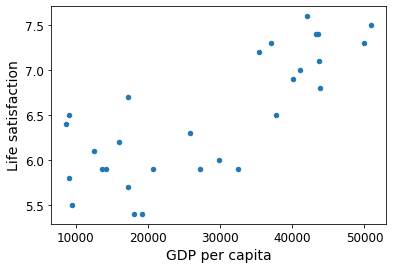

In [10]:

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()



In [11]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 6.25984414]]

[[6.25984414]]


# Note: you can ignore the rest of this notebook, it just generates many of the figures in chapter 1.

# Load and prepare Life satisfaction data

If you want, you can get fresh data from the OECD's website.
Download the CSV from http://stats.oecd.org/index.aspx?DataSetCode=BLI
and save it to `datasets/lifesat/`.

In [13]:
oecd_bli = pd.read_csv( "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,Labour market insecurity,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,5.4,82.5,7.3,1.31,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,3.5,81.7,7.1,1.84,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0


In [14]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      7.1
Belgium      6.9
Brazil       6.4
Canada       7.4
Name: Life satisfaction, dtype: float64

# Load and prepare GDP per capita data

Just like above, you can update the GDP per capita data if you want. Just download data from http://goo.gl/j1MSKe (=> imf.org) and save it to `datasets/lifesat/`.

In [15]:
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=',', delimiter=',',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [16]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,Labour market insecurity,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
South Africa,22.0,37.0,73.0,18.12,43.0,36.1,13.7,NaN,NaN,18.0,NaN,57.5,4.7,16.46,NaN,88.0,NaN,NaN,NaN,NaN,14.92,73.0,67.0,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5694.572,2014.0
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,NaN,76.2,6.3,0.79,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6083.510,2014.0
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,NaN,74.8,6.4,NaN,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,16.0,25.5,38.0,28.70,61.0,41.8,18.1,NaN,NaN,20.0,5.5,75.4,6.5,0.07,15314.0,81.0,1.0,66.0,3.2,416.0,NaN,63.0,68.0,15.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,14.8,94.0,0.14,70.0,52.8,9.6,NaN,NaN,18.0,NaN,71.8,5.8,1.59,NaN,89.0,0.9,43.0,NaN,492.0,NaN,68.0,55.0,16.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,20.0,8.0,39.0,32.64,52.0,59.8,1.4,NaN,NaN,20.0,12.5,78.0,5.5,2.39,NaN,86.0,1.0,69.0,1.5,425.0,14.79,86.0,65.0,18.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,19.0,4.7,84.0,3.03,68.0,56.3,1.0,NaN,104458.0,19.0,4.7,76.2,5.6,1.72,22576.0,86.0,1.2,60.0,1.2,474.0,NaN,70.0,77.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,22.0,3.0,92.0,5.95,66.0,67.3,0.7,19814.0,210991.0,22.0,5.7,78.0,6.1,1.52,27046.0,86.0,1.1,58.0,2.6,504.0,14.42,55.0,82.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,8.7,79.9,6.5,NaN,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0


In [17]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       55805.204
Life satisfaction        6.900
Name: United States, dtype: float64

In [18]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(39))  - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

In [19]:
sample_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,6.4
Mexico,9009.280,6.5
Russia,9054.914,5.8
Turkey,9437.372,5.5
Poland,12495.334,6.1
Latvia,13618.569,5.9
Lithuania,14210.280,5.9
Slovak Republic,15991.736,6.2
Czech Republic,17256.918,6.7


What is the trend? 

(9000, 1)
(18000, 1.7)
(29000, 2.4)
(49000, 3.0)
(55000, 3.8)


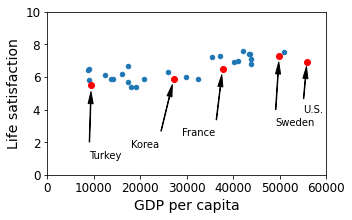

In [20]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Turkey": (9000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Sweden": (49000, 3.0),
    "United States": (55000, 3.8),
}
for country, pos_text in position_text.items():
    print(pos_text)
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
# save_fig('money_happy_scatterplot')
plt.show()

In [21]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Turkey,9437.372,5.5
Korea,27195.197,5.9
France,37675.006,6.5
Sweden,49866.266,7.3
United States,55805.204,6.9


What can be the chosen as the model?


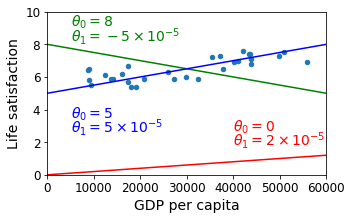

In [22]:
import numpy as np

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 5 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 5$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
# save_fig('tweaking_model_params_plot')
plt.show()

Can you find the model more systematically?

In [23]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Pretty close to our guess!

In [24]:
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(5.591709585280991, 2.9967251340162343e-05)

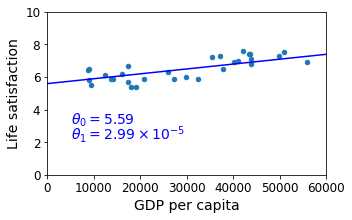

In [25]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 5.59$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 2.99 \times 10^{-5}$", fontsize=14, color="b")
# save_fig('best_fit_model_plot')
plt.show()


Now, let's Test our model! 

For Cyprus, We have GDP, but life satisfaction is not available...

In [27]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_satisfaction




22587.49


6.268594575254394

Not available in training

In [28]:
luxembourg_gdp_per_capita = gdp_per_capita.loc["Luxembourg"]["GDP per capita"]
print(luxembourg_gdp_per_capita)
luxembourg_predicted_life_satisfaction = lin1.predict([[luxembourg_gdp_per_capita]])[0][0]
luxembourg_predicted_life_satisfaction

101994.09300000001


8.648192205423884

In [29]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["Luxembourg"]


GDP per capita       101994.093
Life satisfaction         6.900
Name: Luxembourg, dtype: float64

Available in training

In [30]:
turkey_gdp_per_capita = gdp_per_capita.loc["Turkey"]["GDP per capita"]
print(turkey_gdp_per_capita)
turkey_predicted_life_satisfaction = lin1.predict([[turkey_gdp_per_capita]])[0][0]
turkey_predicted_life_satisfaction

9437.372


5.874521683995601

In [31]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["Turkey"]


GDP per capita       9437.372
Life satisfaction       5.500
Name: Turkey, dtype: float64

Why it is not exactly the same for Turkey?

Let's check the cyprus again!

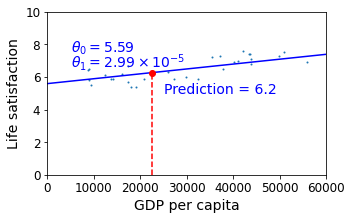

In [32]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 5.59$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 2.99 \times 10^{-5}$", fontsize=14, color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 6.2", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
# save_fig('cyprus_prediction_plot')
plt.show()

What if we use an instance based approach and find the life satisfaction of cyprus? checking neighbours!

Find 2 closest neighbours!



In [33]:
sample_data[11:15]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.592,5.4
Slovenia,20732.482,5.9
Spain,25864.721,6.3
Korea,27195.197,5.9


In [34]:
(5.9+6.3)/2

6.1

In [35]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    # gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita = gdp_per_capita.rename(columns={"2015": "GDP per capita"})

    # gdp_per_capita.set_index("Country", inplace=True)
    gdp_per_capita = gdp_per_capita.set_index("Country")

    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    # full_country_stats.sort_values(by="GDP per capita", inplace=True)
    full_country_stats = full_country_stats.sort_values(by="GDP per capita")

    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

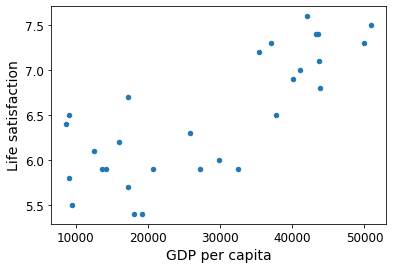

[[6.25986317]]


In [36]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter=',',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587.49]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 6.25986317]]

In [37]:
oecd_bli, gdp_per_capita = backup

What samples are missing from our training?

In [38]:
missing_data

,GDP per capita,Life satisfaction
Country,,
South Africa,5694.572,4.7
Colombia,6083.510,6.3
Hungary,12239.894,5.6
Chile,13340.905,6.5
Australia,50961.865,7.3
Ireland,51350.744,7.0
Denmark,52114.165,7.6


In [39]:
position_text2 = {
    "South Africa": (5600, 4.2),
    "Colombia": (5500, 7.0),
    "Hungary": (12000, 4.5),
    "Chile": (10000, 7.5),
    "Australia": (40000, 7.5),
    "Ireland": (55000, 7),
    "Denmark": (62000, 7.5),
}

What if we add all missing samples to our training?


In [41]:
lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]

print(t0full)
print(t1full)

5.724081771574703
2.469044208176925e-05


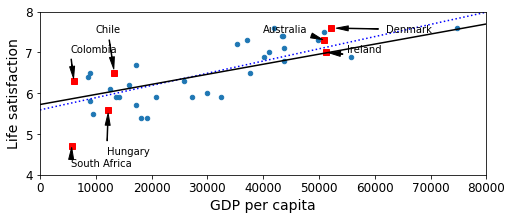

In [42]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 80000, 4, 8])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 80000, 1000)
plt.plot(X, t0 + t1*X, "b:")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.show()


First training set (first model) wasn't representative, why? poor and rich countries were missing... 

But adding more training sample, does it make things better? not really, the linear model can't represente the whole pattern ... some poor countries are happier than some very rich countries!

Can we have a more representative model? 
Is a linear model still an option?

/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


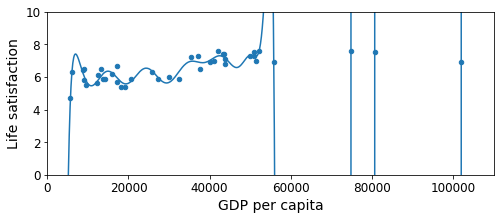

In [102]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
# save_fig('overfitting_model_plot')
plt.show()

Is it a good model?

What else can be used as an input feature?

Country names?

In [43]:
full_country_stats.loc[[c for c in full_country_stats.index if "W" in c.upper()]]["Life satisfaction"]

Country
New Zealand    7.3
Sweden         7.3
Norway         7.6
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [44]:
# oecd_bli.index

In [45]:
# gdp_per_capita.index

In [46]:
gdp_per_capita.loc[[c for c in gdp_per_capita[:-3].index if "W" in c.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


# OK, some models are overfitting!
# How should we fix it? 
# How can we get a generalized solution? regularization!










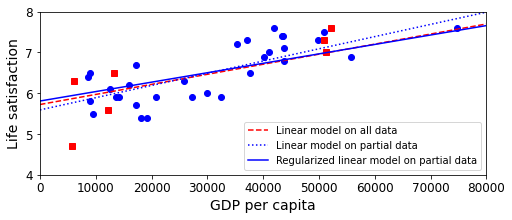

In [54]:
plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 80000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 80000, 4, 8])
# save_fig('ridge_model_plot')
plt.show()

# Using K Nearest Neighbors to predict Cyprus life satisfaction! 

In [57]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    return sample_data

In [58]:
# Replace this linear model:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()

In [59]:
# with this k-neighbors regression model:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=2)

In [60]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = np.array([[22587.0]])  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 6.1]]

[[6.1]]


# Question 1: find two countries with the least and most value for life satisfaction.

In [117]:
Least_life_satisfaction = oecd_bli[['Life satisfaction']].sort_values(by='Life satisfaction').iloc[0]
print(Least_life_satisfaction.name)
print(Least_life_satisfaction.values[0])

South Africa
4.7


In [118]:
Least_life_satisfaction = oecd_bli[['Life satisfaction']].sort_values(by='Life satisfaction').iloc[-1]
print(Least_life_satisfaction.name)
print(Least_life_satisfaction.values[0])

Denmark
7.6


# Question 2: how Denmark and South Africa are different in terms of indicators?

In [138]:
oecd_bli.loc['South Africa'] 

Indicator
Air pollution                                        22.00
Dwellings without basic facilities                   37.00
Educational attainment                               73.00
Employees working very long hours                    18.12
Employment rate                                      43.00
Feeling safe walking alone at night                  36.10
Homicide rate                                        13.70
Household net adjusted disposable income               NaN
Household net wealth                                   NaN
Housing expenditure                                  18.00
Labour market insecurity                               NaN
Life expectancy                                      57.50
Life satisfaction                                     4.70
Long-term unemployment rate                          16.46
Personal earnings                                      NaN
Quality of support network                           88.00
Rooms per person                              

In [137]:
oecd_bli.loc['Denmark']

Indicator
Air pollution                                             9.00
Dwellings without basic facilities                        0.50
Educational attainment                                   81.00
Employees working very long hours                         2.34
Employment rate                                          74.00
Feeling safe walking alone at night                      83.50
Homicide rate                                             0.60
Household net adjusted disposable income              29606.00
Household net wealth                                 118637.00
Housing expenditure                                      23.00
Labour market insecurity                                  4.20
Life expectancy                                          80.90
Life satisfaction                                         7.60
Long-term unemployment rate                               1.31
Personal earnings                                     51466.00
Quality of support network                   

# What are diferences between two countries in terms of "Employment rate", "Feeling safe walking alone at night" and "Life expectancy" ? 

In [139]:
oecd_bli.loc['South Africa'] - oecd_bli.loc['Denmark']


Indicator
Air pollution                                        13.00
Dwellings without basic facilities                   36.50
Educational attainment                               -8.00
Employees working very long hours                    15.78
Employment rate                                     -31.00
Feeling safe walking alone at night                 -47.40
Homicide rate                                        13.10
Household net adjusted disposable income               NaN
Household net wealth                                   NaN
Housing expenditure                                  -5.00
Labour market insecurity                               NaN
Life expectancy                                     -23.40
Life satisfaction                                    -2.90
Long-term unemployment rate                          15.15
Personal earnings                                      NaN
Quality of support network                           -7.00
Rooms per person                              

# Which of these 3 indicators can be used as a good feature to predict GDP?

In [145]:
def prepare_country_stats(oecd_bli, gdp_per_capita, indicator_name):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    # gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita = gdp_per_capita.rename(columns={"2015": "GDP per capita"})

    # gdp_per_capita.set_index("Country", inplace=True)
    gdp_per_capita = gdp_per_capita.set_index("Country")

    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    # full_country_stats.sort_values(by="GDP per capita", inplace=True)
    full_country_stats = full_country_stats.sort_values(by="GDP per capita")

    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", indicator_name]].iloc[keep_indices]

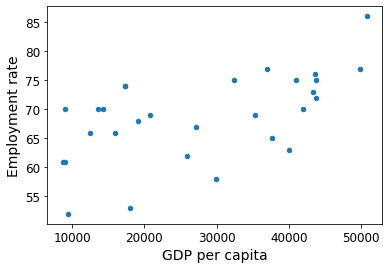

In [146]:
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter=',',
                             encoding='latin1', na_values="n/a")


# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita, 'Employment rate')
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Employment rate"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Employment rate')
plt.show()


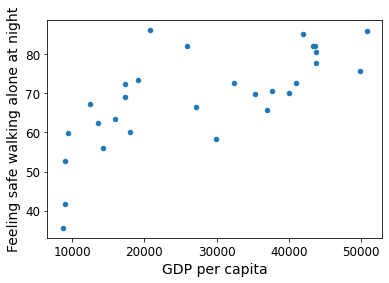

In [147]:

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita, 'Feeling safe walking alone at night')
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Feeling safe walking alone at night"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Feeling safe walking alone at night')
plt.show()

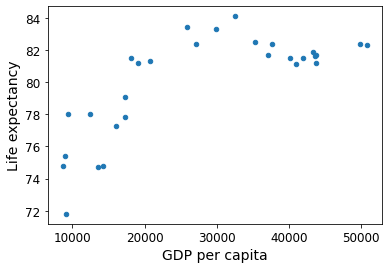

In [148]:

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita, 'Life expectancy')
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life expectancy"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life expectancy')
plt.show()

# Can you build a model for your choice of feature?

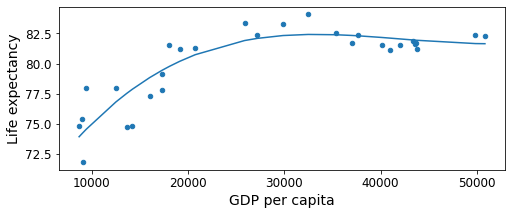

In [168]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life expectancy', figsize=(8,3))

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg3 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg3)])
pipeline_reg.fit(X, y)
curve = pipeline_reg.predict(X)
plt.plot(X, curve)
plt.show()

In [169]:
Canada_gdp_per_capita = country_stats.loc["Canada"]
print(Canada_gdp_per_capita)
Canada_predicted_life_satisfaction = pipeline_reg.predict([[43331.961]])
Canada_predicted_life_satisfaction

GDP per capita     43331.961
Life expectancy       81.900
Name: Canada, dtype: float64


array([[81.95845799]])